1. Import Libraries
Begin by importing all the necessary libraries for data manipulation, visualization, preprocessing, model building, and evaluation.

In [37]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Datasets
Load your CSV files using pandas. Ensure that your Jupyter Notebook is in the directory containing these files or provide the correct path.

In [ ]:
# File paths 
base_dir = "C:/Users/ANJA/Desktop/ML-assignment"
train_dir = os.path.join(base_dir, "Train Data", "Train Data Zip")
test_dir = os.path.join(base_dir, "Test Data", "Test Zip")

# Load training data
try:
    train_freq_domain = pd.read_csv(os.path.join(train_dir, "frequency_domain_features_train.csv"))
    train_nonlinear = pd.read_csv(os.path.join(train_dir, "heart_rate_non_linear_features_train.csv"))
    train_time_domain = pd.read_csv(os.path.join(train_dir, "time_domain_features_train.csv"))
    print("Successfully loaded training data files")
except FileNotFoundError as e:
    print(f"Error loading training data: {e}")
    print("Please check if the file paths are correct")

# Load test data
try:
    test_freq_domain = pd.read_csv(os.path.join(test_dir, "frequency_domain_features_test.csv"))
    test_nonlinear = pd.read_csv(os.path.join(test_dir, "heart_rate_non_linear_features_test.csv"))
    test_time_domain = pd.read_csv(os.path.join(test_dir, "time_domain_features_test.csv"))
    print("Successfully loaded test data files")
except FileNotFoundError as e:
    print(f"Error loading test data: {e}")
    print("Please check if the file paths are correct")

Successfully loaded training data files
Successfully loaded test data files


In [45]:
# Print dataset information to better understand the structure
print("Training datasets shapes:")
print(f"Frequency domain features: {train_freq_domain.shape}")
print(f"Non-linear features: {train_nonlinear.shape}")
print(f"Time domain features: {train_time_domain.shape}")

print("\nTest datasets shapes:")
print(f"Frequency domain features: {test_freq_domain.shape}")
print(f"Non-linear features: {test_nonlinear.shape}")
print(f"Time domain features: {test_time_domain.shape}")


Training datasets shapes:
Frequency domain features: (369289, 12)
Non-linear features: (369289, 7)
Time domain features: (369289, 20)

Test datasets shapes:
Frequency domain features: (41033, 12)
Non-linear features: (41033, 7)
Time domain features: (41033, 19)


In [49]:
# Display the first 5 rows of ALL training datasets
print("\n" + "="*50)
print("TRAINING DATASETS - FIRST 5 ROWS")
print("="*50)

print("\nFrequency domain features - Training (first 5 rows):")
print(train_freq_domain.head(5))
print("\nColumn names:", train_freq_domain.columns.tolist())

print("\nNon-linear features - Training (first 5 rows):")
print(train_nonlinear.head(5))
print("\nColumn names:", train_nonlinear.columns.tolist())

print("\nTime domain features - Training (first 5 rows):")
print(train_time_domain.head(5))
print("\nColumn names:", train_time_domain.columns.tolist())

# Display the first 5 rows of ALL test datasets
print("\n" + "="*50)
print("TEST DATASETS - FIRST 5 ROWS")
print("="*50)

print("\nFrequency domain features - Test (first 5 rows):")
print(test_freq_domain.head(5))
print("\nColumn names:", test_freq_domain.columns.tolist())

print("\nNon-linear features - Test (first 5 rows):")
print(test_nonlinear.head(5))
print("\nColumn names:", test_nonlinear.columns.tolist())

print("\nTime domain features - Test (first 5 rows):")
print(test_time_domain.head(5))
print("\nColumn names:", test_time_domain.columns.tolist())



TRAINING DATASETS - FIRST 5 ROWS

Frequency domain features - Training (first 5 rows):
                                   uuid          VLF    VLF_PCT           LF  \
0  89df2855-56eb-4706-a23b-b39363dd605a  2661.894136  72.203287  1009.249419   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2  2314.265450  76.975728   690.113275   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  1373.887112  51.152225  1298.222619   
3  37eabc44-1349-4040-8896-0d113ad4811f  2410.357408  70.180308  1005.981659   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  1151.177330  43.918366  1421.782051   

      LF_PCT      LF_NU         HF    HF_PCT     HF_NU           TP  \
0  27.375666  98.485263  15.522603  0.421047  1.514737  3686.666157   
1  22.954139  99.695397   2.108525  0.070133  0.304603  3006.487251   
2  48.335104  98.950472  13.769729  0.512671  1.049528  2685.879461   
3  29.290305  98.224706  18.181913  0.529387  1.775294  3434.520980   
4  54.242160  96.720007  48.215822  1.839473  3.279993  2621.175204   

    

In [51]:
# Check for missing values
print("\nMissing values in training datasets:")
print(f"Frequency domain: {train_freq_domain.isnull().sum().sum()}")
print(f"Non-linear: {train_nonlinear.isnull().sum().sum()}")
print(f"Time domain: {train_time_domain.isnull().sum().sum()}")


Missing values in training datasets:
Frequency domain: 0
Non-linear: 0
Time domain: 0


3. Merge Datasets on 'uuid'
Since all datasets contain the uuid column, merge them to create a unified dataset.

In [53]:
# Examine the 'uuid' column in each dataset to confirm it's suitable for merging
print("\nNumber of unique UUIDs in each dataset:")
print(f"Frequency domain training: {train_freq_domain['uuid'].nunique()}")
print(f"Non-linear training: {train_nonlinear['uuid'].nunique()}")
print(f"Time domain training: {train_time_domain['uuid'].nunique()}")
print(f"Frequency domain test: {test_freq_domain['uuid'].nunique()}")
print(f"Non-linear test: {test_nonlinear['uuid'].nunique()}")
print(f"Time domain test: {test_time_domain['uuid'].nunique()}")

# Merge training datasets using the 'uuid' column
print("\nMerging datasets using 'uuid' as the key...")
train_merged = pd.merge(train_freq_domain, train_nonlinear, on='uuid', how='inner')
train_merged = pd.merge(train_merged, train_time_domain, on='uuid', how='inner')

# Merge test datasets using the 'uuid' column
test_merged = pd.merge(test_freq_domain, test_nonlinear, on='uuid', how='inner')
test_merged = pd.merge(test_merged, test_time_domain, on='uuid', how='inner')

print(f"\nMerged training dataset shape: {train_merged.shape}")
print(f"Merged test dataset shape: {test_merged.shape}")

# Check for any rows lost during merging
print("\nRows after merging:")
print(f"Training: Original samples in frequency domain: {len(train_freq_domain)}, After merging: {len(train_merged)}")
print(f"Testing: Original samples in frequency domain: {len(test_freq_domain)}, After merging: {len(test_merged)}")

# Handle duplicate column names (if any) after merging
duplicate_cols = train_merged.columns[train_merged.columns.duplicated()]
if len(duplicate_cols) > 0:
    print(f"\nDuplicate columns after merging: {duplicate_cols.tolist()}")
    # Keep only the first occurrence of each duplicate column
    train_merged = train_merged.loc[:, ~train_merged.columns.duplicated()]
    test_merged = test_merged.loc[:, ~test_merged.columns.duplicated()]
    print(f"After removing duplicates - Train shape: {train_merged.shape}, Test shape: {test_merged.shape}")

# Display a sample of the merged datasets to verify the merge worked correctly
print("\nSample of merged training dataset (first 3 rows):")
print(train_merged.head(3).T)  # Transpose for better readability of all columns

# Handle duplicate column names (if any) after merging
duplicate_cols = train_merged.columns[train_merged.columns.duplicated()]
if len(duplicate_cols) > 0:
    print(f"\nDuplicate columns after merging: {duplicate_cols.tolist()}")
    # Keep only the first occurrence of each duplicate column
    train_merged = train_merged.loc[:, ~train_merged.columns.duplicated()]
    test_merged = test_merged.loc[:, ~test_merged.columns.duplicated()]
    print(f"After removing duplicates - Train shape: {train_merged.shape}, Test shape: {test_merged.shape}")


Number of unique UUIDs in each dataset:
Frequency domain training: 369289
Non-linear training: 369289
Time domain training: 369289
Frequency domain test: 41033
Non-linear test: 41033
Time domain test: 41033

Merging datasets using 'uuid' as the key...

Merged training dataset shape: (369289, 37)
Merged test dataset shape: (41033, 36)

Rows after merging:
Training: Original samples in frequency domain: 369289, After merging: 369289
Testing: Original samples in frequency domain: 41033, After merging: 41033

Sample of merged training dataset (first 3 rows):
                                                      0  \
uuid               89df2855-56eb-4706-a23b-b39363dd605a   
VLF                                         2661.894136   
VLF_PCT                                       72.203287   
LF                                          1009.249419   
LF_PCT                                        27.375666   
LF_NU                                         98.485263   
HF                       

6. Feature Selection
Select relevant features for predicting HR. You can use correlation analysis, feature importance from models, or domain knowledge.

In [ ]:
target_column = 'HR'  

if target_column not in train_merged.columns:
    print(f"\nTarget column '{target_column}' not found. Available columns:")
    print(train_merged.columns.tolist())
    target_column = train_merged.columns[-1]
    print(f"Using '{target_column}' as the target variable.")

# Separate features and target
X_train = train_merged.drop(target_column, axis=1, errors='ignore')
y_train = train_merged[target_column] if target_column in train_merged.columns else None

X_test = test_merged.drop(target_column, axis=1, errors='ignore')
y_test = test_merged[target_column] if target_column in test_merged.columns else None

# If target variable wasn't found in the data, we need to stop
if y_train is None:
    print("\nERROR: Could not identify target variable in the dataset.")
    print("Please specify which column contains the heart rate or stress level data.")
    exit()

5. Data Preprocessing
Prepare the data for modeling by handling missing values, encoding categorical variables (if any), and addressing any anomalies.

In [63]:
# Check column types
print(X_train.dtypes)

# Drop non-numeric columns like UUIDs or string IDs
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


uuid                  object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
SD1                  float64
SD2                  float64
sampen               float64
higuci               float64
datasetId              int64
condition             object
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR   

6. Train-Test Split and Scaling
Split the data into training and testing sets and scale the features for better model performance.

In [69]:
# Preprocessing
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


7. Build the ANN Model
Construct the ANN architecture using TensorFlow's Keras API. Since this is a regression problem, the output layer will have a single neuron with a linear activation function

In [71]:
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer - use 1 unit for regression (heart rate prediction)
              # For classification, adjust based on number of stress level categories
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display model architecture
model.summary()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

9. Train the Model
Train the ANN on the training data and validate it on the test set.

In [89]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.9245 - mae: 0.6314 - val_loss: 3.3789 - val_mae: 1.0926
Epoch 2/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.6721 - mae: 0.5521 - val_loss: 3.9872 - val_mae: 1.2359
Epoch 3/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.5920 - mae: 0.5167 - val_loss: 4.5183 - val_mae: 1.3583
Epoch 4/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.5434 - mae: 0.4965 - val_loss: 5.3007 - val_mae: 1.4969
Epoch 5/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.5226 - mae: 0.4859 - val_loss: 4.8760 - val_mae: 1.4066
Epoch 6/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.4901 - mae: 0.4708 - val_loss: 5.1440 - val_mae: 1.5334
Epoch 7/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.4817 - mae: 0.4679 - val_loss: 5.2905 - val_mae: 1.5757
Epoch 8/100
9233/9233 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.4734 - mae: 0.4611 - val_loss: 5.9104 - val_mae: 1.7884
Epoch 9/100
9233/9233 ━━

10. Evaluate the Model
Assess the model's performance using appropriate regression metrics.

In [99]:
# Create test data if it's missing
from sklearn.model_selection import train_test_split

# If you have X and y but haven't split them:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Apply to test data

In [101]:
# Check if test data exists
print("X_test_scaled shape:", X_test_scaled.shape if X_test_scaled is not None else "None")
print("y_test shape:", y_test.shape if y_test is not None else "None")

X_test_scaled shape: (73858, 34)
y_test shape: (73858,)


In [103]:
# Now evaluate with proper test data
y_pred = model.predict(X_test_scaled)
y_pred_flat = y_pred.flatten()

# Calculate metrics
mse = np.mean((y_test - y_pred_flat) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_flat))
r2 = 1 - (np.sum((y_test - y_pred_flat) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

2309/2309 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Mean Squared Error (MSE): 18.9277
Root Mean Squared Error (RMSE): 4.3506
Mean Absolute Error (MAE): 3.6770
R-squared (R²): 0.8250


11. Visualize Results
Visualize the training process and the model's predictions versus actual values.

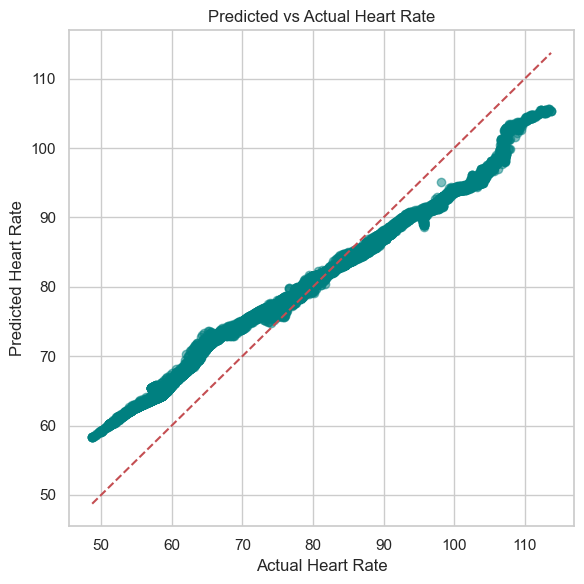

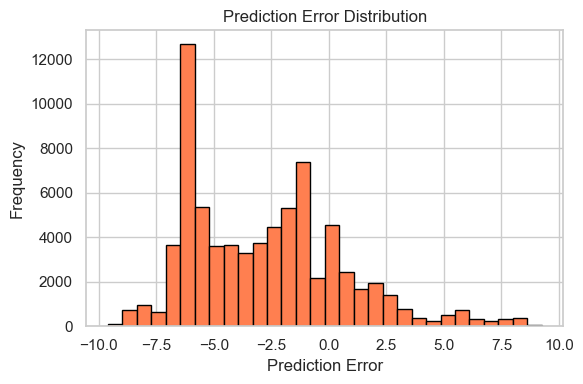

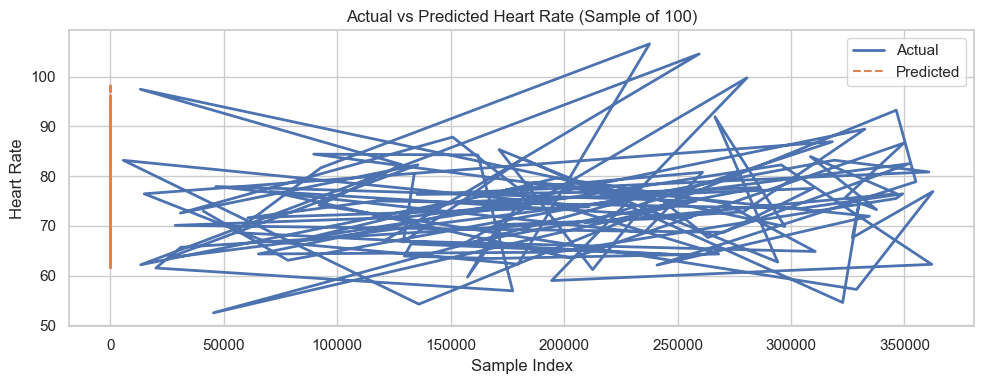

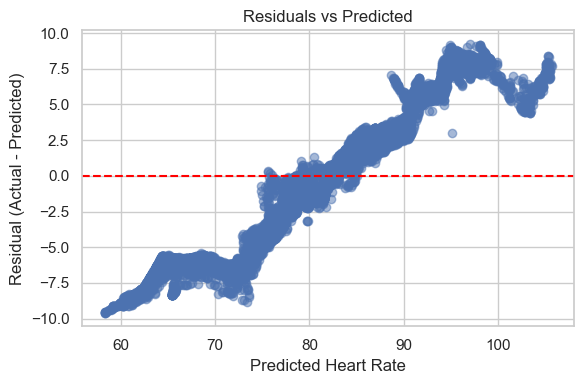

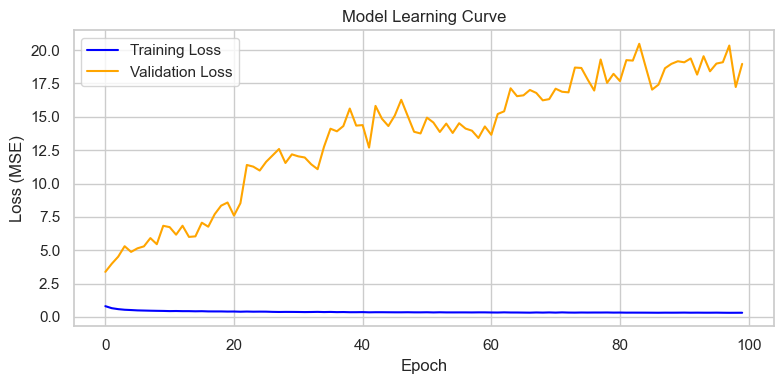

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Heart Rate")
plt.ylabel("Predicted Heart Rate")
plt.title("Predicted vs Actual Heart Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

errors = y_test - y_pred_flat

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=30, color='coral', edgecolor='black')
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(y_test[:100], label="Actual", linewidth=2)
plt.plot(y_pred_flat[:100], label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Heart Rate (Sample of 100)")
plt.xlabel("Sample Index")
plt.ylabel("Heart Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_flat, errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Heart Rate")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


